In [2]:
# import required libraries to munge data
import pandas as pd
import numpy as np

In [3]:
# import matplotlib to draw plot inside of notebook
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# Start from grid table
acc_table = pd.read_csv("grid.csv", header=0)
grid_table = acc_table

In [5]:
# Make 10 random tables
random_table_list = []
for i in range(10):
    randomized_table = acc_table.sample(frac=1).reset_index(drop=True)
    random_table = pd.DataFrame(randomized_table[["Setting", "Step",  "Param1", "Param2", "Param3", "Param4",\
                                           "Elapsed Time", "Metric1"]])
    random_table_list.append(random_table)

print len(random_table_list)

10


In [6]:
# Check shuffled
print random_table_list[2].head(10)

                                       Setting     Step  Param1  Param2  \
0       filter:2-conv1:8-conv2:1-fc:4-Momentum  1_epoch       2       8   
1      filter:2-conv1:1-conv2:16-fc:4-Momentum  1_epoch       2       1   
2       filter:8-conv1:1-conv2:8-fc:4-Momentum  1_epoch       8       1   
3   filter:12-conv1:4-conv2:256-fc:16-Momentum  1_epoch      12       4   
4   filter:2-conv1:256-conv2:128-fc:1-Momentum  1_epoch       2     256   
5  filter:2-conv1:32-conv2:256-fc:256-Momentum  1_epoch       2      32   
6   filter:14-conv1:256-conv2:64-fc:4-Momentum  1_epoch      14     256   
7     filter:6-conv1:16-conv2:32-fc:4-Momentum  1_epoch       6      16   
8     filter:6-conv1:512-conv2:8-fc:1-Momentum  1_epoch       6     512   
9     filter:4-conv1:128-conv2:8-fc:4-Momentum  1_epoch       4     128   

   Param3  Param4  Elapsed Time  Metric1  
0       1       4         0.156    61.62  
1      16       4         0.191    27.94  
2       8       4         0.249    72.69  
3 

In [7]:
# cumulate elapsed time to Total time
def get_total_time_list(test_acuracies):
    count = len(test_acuracies)
    current_total = 0
    total_times = []
    for i in range(count):
        test_time = test_acuracies["Elapsed Time"][i]
        current_total += test_time
        total_times.append(current_total)
    return total_times


In [8]:
# add total time column

grid_table["Total Time"] = get_total_time_list(grid_table)

for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    random_table["Total Time"] = get_total_time_list(random_table)
    

In [9]:
# check Total time
random_table_list[3].tail(10)

,Setting,Step,Param1,Param2,Param3,Param4,Elapsed Time,Metric1,Total Time
5976,filter:14-conv1:128-conv2:128-fc:32-Momentum,1_epoch,14,128,128,32,1.200,10.28,4141.245
5977,filter:6-conv1:4-conv2:64-fc:128-Momentum,1_epoch,6,4,64,128,0.239,97.27,4141.484
5978,filter:2-conv1:256-conv2:256-fc:8-Momentum,1_epoch,2,256,256,8,1.150,82.39,4142.634
5979,filter:14-conv1:32-conv2:32-fc:8-Momentum,1_epoch,14,32,32,8,0.304,56.98,4142.938
5980,filter:14-conv1:16-conv2:64-fc:8-Momentum,1_epoch,14,16,64,8,0.288,10.28,4143.226
5981,filter:12-conv1:4-conv2:64-fc:512-Momentum,1_epoch,12,4,64,512,0.263,94.54,4143.489
5982,filter:14-conv1:16-conv2:2-fc:1-Momentum,1_epoch,14,16,2,1,0.381,25.25,4143.870
5983,filter:6-conv1:32-conv2:16-fc:4-Momentum,1_epoch,6,32,16,4,0.354,75.84,4144.224
5984,filter:2-conv1:512-conv2:8-fc:2-Momentum,1_epoch,2,512,8,2,1.400,28.05,4145.624
5985,filter:2-conv1:512-conv2:1-fc:512-Momentum,1_epoch,2,512,1,512,0.985,91.74,4146.609


In [10]:
def get_best_acc_list(table):
    count = len(table)
    current_best = 0
    best_acc = []
    for i in range(count):
        test_acc = table["Metric1"][i]
        if current_best < test_acc:
            current_best = test_acc

        best_acc.append(current_best)
    return best_acc

best_acc_list = get_best_acc_list(random_table_list[0]) 

In [11]:
# Add current best accuracy column
for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    best_acc_list = get_best_acc_list(random_table) 
    random_table['Best'] = best_acc_list

random_table_list[9].head(10)

,Setting,Step,Param1,Param2,Param3,Param4,Elapsed Time,Metric1,Total Time,Best
0,filter:14-conv1:32-conv2:1-fc:512-Momentum,1_epoch,14,32,1,512,0.310,10.28,0.310,10.28
1,filter:12-conv1:128-conv2:2-fc:256-Momentum,1_epoch,12,128,2,256,0.721,10.28,1.031,10.28
2,filter:8-conv1:256-conv2:128-fc:128-Momentum,1_epoch,8,256,128,128,1.370,10.28,2.401,10.28
3,filter:14-conv1:2-conv2:1-fc:16-Momentum,1_epoch,14,2,1,16,0.195,90.68,2.596,90.68
4,filter:14-conv1:2-conv2:4-fc:8-Momentum,1_epoch,14,2,4,8,0.175,89.71,2.771,90.68
5,filter:14-conv1:32-conv2:128-fc:4-Momentum,1_epoch,14,32,128,4,0.457,10.28,3.228,90.68
6,filter:2-conv1:128-conv2:2-fc:64-Momentum,1_epoch,2,128,2,64,0.484,92.27,3.712,92.27
7,filter:14-conv1:256-conv2:16-fc:64-Momentum,1_epoch,14,256,16,64,1.100,93.58,4.812,93.58
8,filter:14-conv1:32-conv2:2-fc:256-Momentum,1_epoch,14,32,2,256,0.275,10.28,5.087,93.58
9,filter:12-conv1:512-conv2:4-fc:128-Momentum,1_epoch,12,512,4,128,1.750,10.28,6.837,93.58


In [12]:
# Save random search results
csv_file_preamble = 'random_best_'
for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    csv_file_name = csv_file_preamble + str(i) + '.csv'
    random_table.to_csv(csv_file_name)

In [13]:
# Save grid table
best_acc_list = get_best_acc_list(grid_table) 
grid_table['Best'] = best_acc_list
grid_table.to_csv('grid_best.csv')

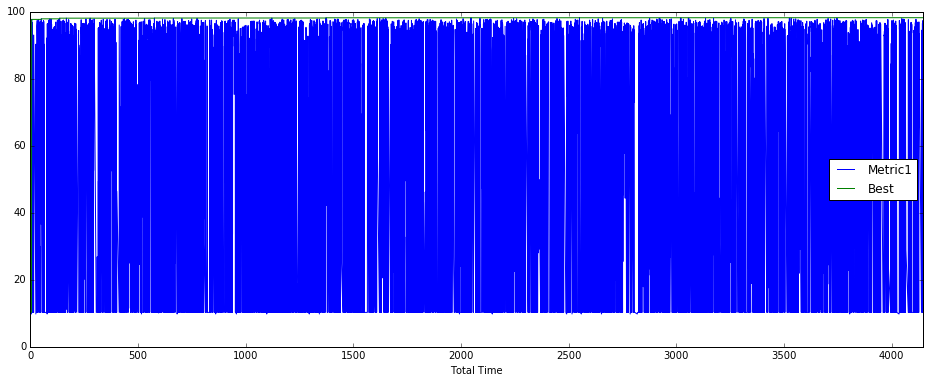

In [12]:
random_table_list[0].plot(x="Total Time", y=["Metric1", "Best"], figsize=(16, 6))

In [14]:
def to_figure(table, algorithm, y_range=[0, 100], show=True):
    fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    subplot = fig.add_subplot(1, 1, 1)
    subplot.plot(table["Total Time"], table["Metric1"], "bo", label="Test Accuracy")
    subplot.plot(table["Total Time"], table["Best"], "r-", label="Best Accuracy")
    title = algorithm  + " test accuracy trends"
    subplot.set_title(title)
    x_max = table["Total Time"][len(table["Total Time"]) - 1]
    subplot.set_xlim([0, x_max])
    subplot.set_ylim(y_range)
    plt.ylabel("test accuracy")
    plt.xlabel("operation time")
    plt.legend(loc="best")
    if show:
        plt.show()
    return fig

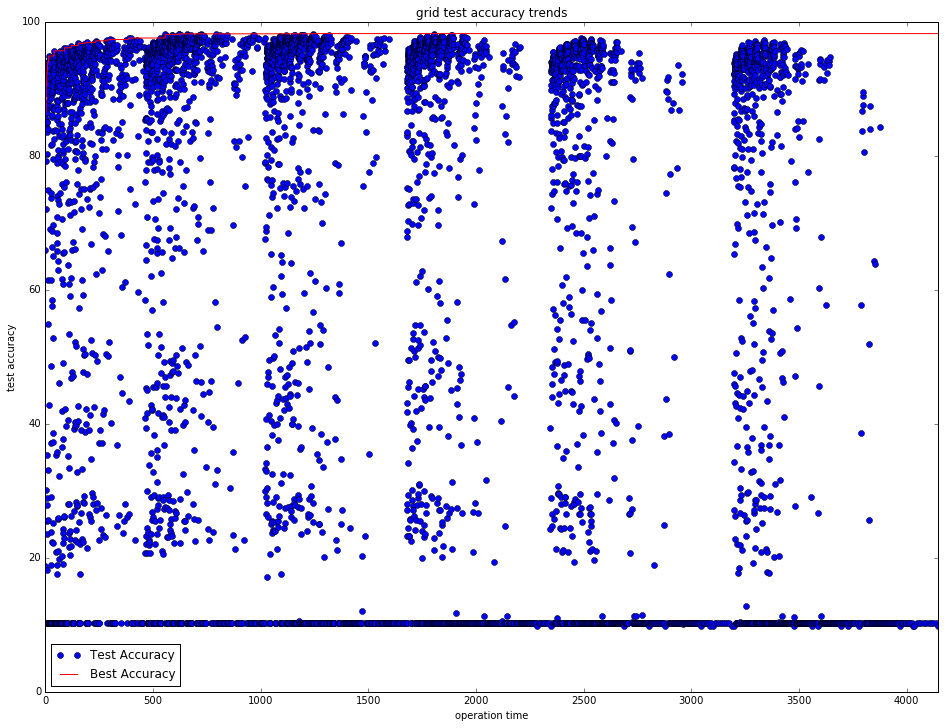

In [41]:
fig = to_figure(grid_table, "grid")
fig.savefig('total_time-test_acc.png', format='png', dpi=600)

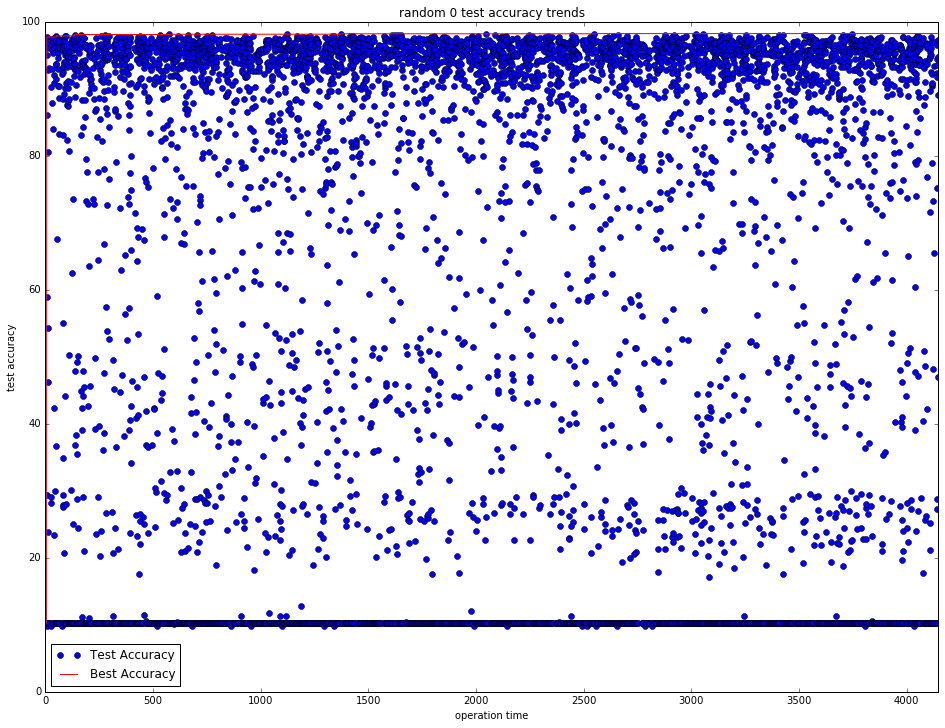

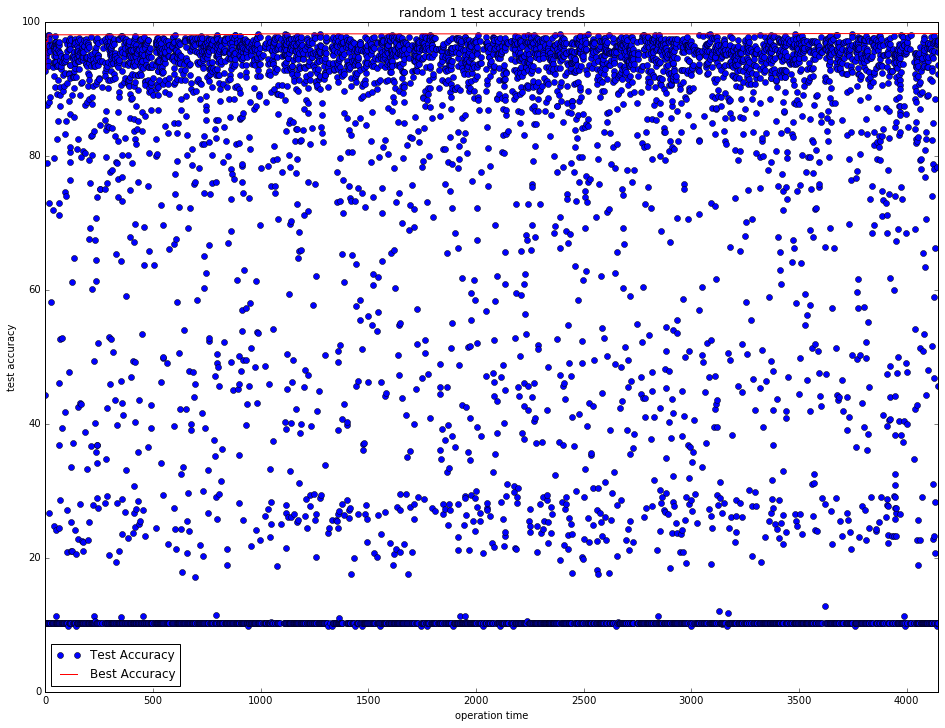

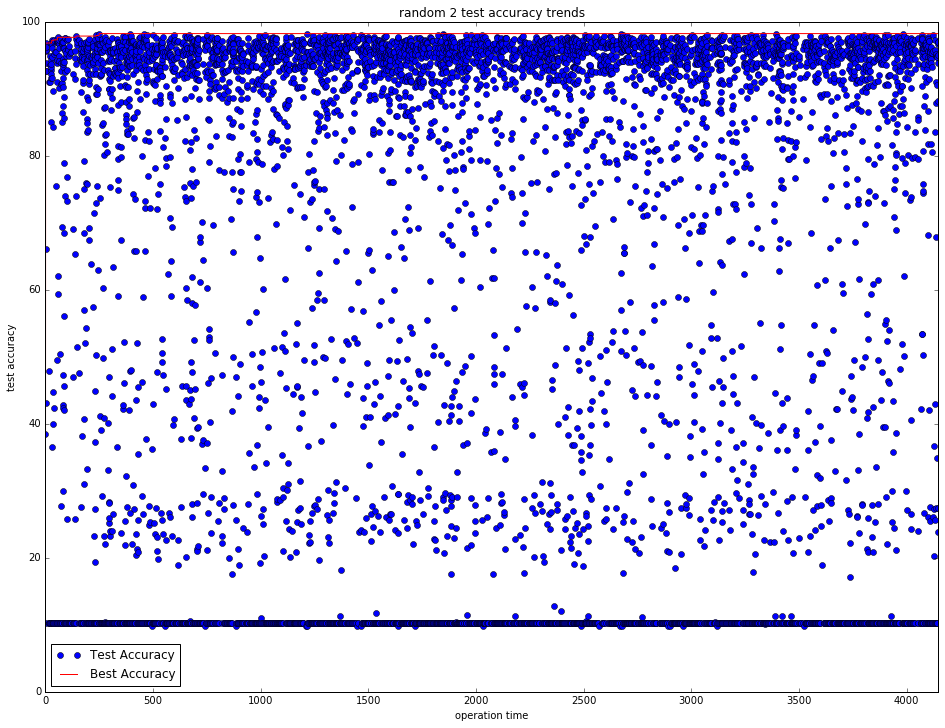

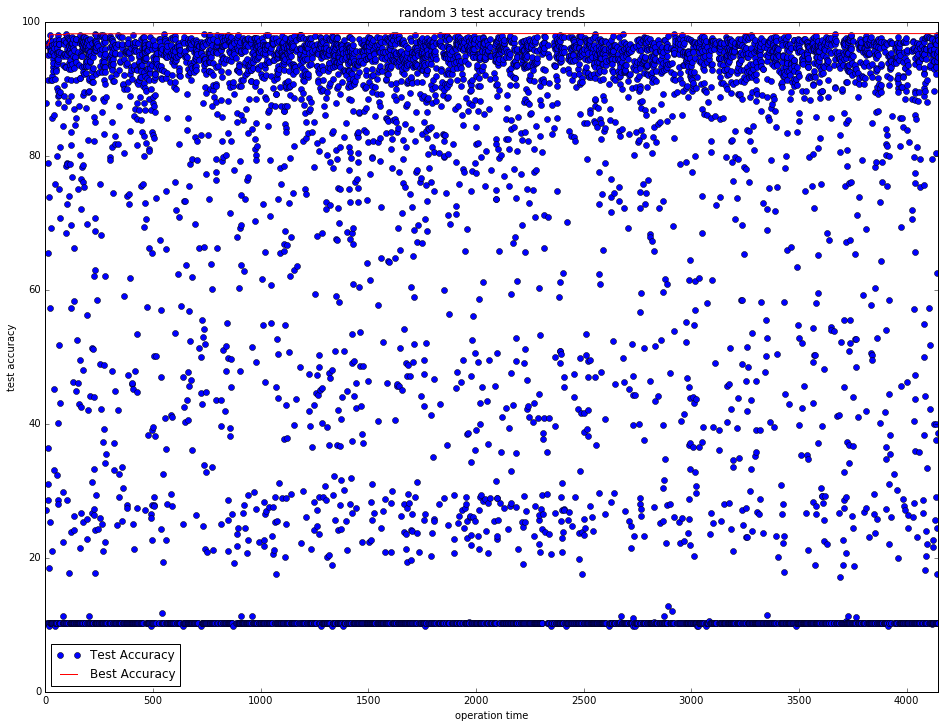

MemoryError: In RendererAgg: Out of memory

In [42]:
for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    search_type = "random " + str(i)
    fig = to_figure(random_table, search_type)
    fig.savefig(search_type + '-total_time-test_acc.png', format='png', dpi=600, show=False)

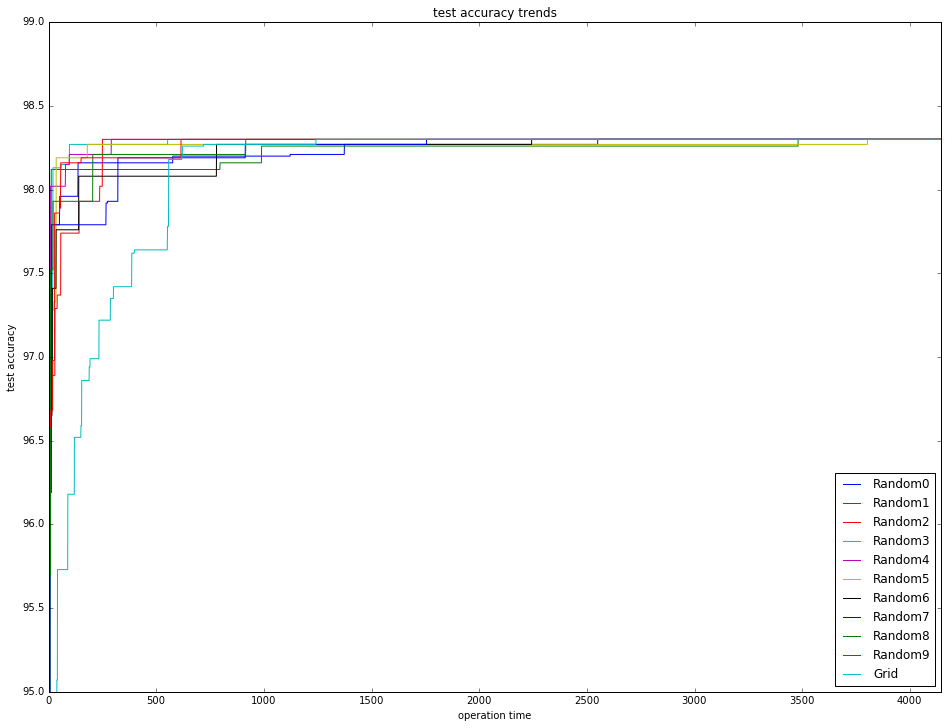

In [38]:
y_range = [95, 99]
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
subplot = fig.add_subplot(1, 1, 1)
for i in range(len(random_table_list)):
    algortithm = "Random" + str(i)
    random_table = random_table_list[i] 
    subplot.plot(random_table["Total Time"], random_table["Best"], label=algortithm)

subplot.plot(grid_table["Total Time"], grid_table["Best"], label="Grid")

title = "test accuracy trends"    
subplot.set_title(title)
x_max = grid_table["Total Time"][len(grid_table["Total Time"]) - 1]
subplot.set_xlim([0, x_max])
subplot.set_ylim(y_range)
plt.ylabel("test accuracy")
plt.xlabel("operation time")
plt.legend(loc="best")
plt.show()


In [36]:
fig.savefig('best_accs_compare.png', format='png', dpi=900)

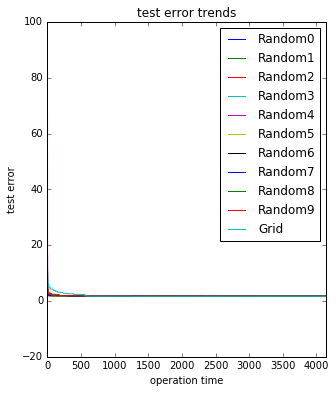

In [21]:
y_range = [-20, 100]
fig = plt.figure(num=None, figsize=(5, 6), dpi=20, facecolor='w', edgecolor='k')
subplot = fig.add_subplot(1, 1, 1)
for i in range(len(random_table_list)):
    algortithm = "Random" + str(i)
    random_table = random_table_list[i] 
    subplot.plot(random_table["Total Time"], 100.0 - random_table["Best"], label=algortithm)

subplot.plot(grid_table["Total Time"], 100.0 - grid_table["Best"], label="Grid")

title = "test error trends"    
subplot.set_title(title)
x_max = grid_table["Total Time"][len(grid_table["Total Time"]) - 1]
subplot.set_xlim([0, x_max])
subplot.set_ylim(y_range)
plt.ylabel("test error")
plt.xlabel("operation time")
plt.legend(loc="best")
plt.show()
